# Success and Failure of Terrorist Attacks

In [1]:
import numpy as np
import pandas as pd
import os
import glob
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [3]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        d = pd.read_csv(source, low_memory=False, encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103])
d.head()

,eventid,iyear,imonth,iday,country_txt,provstate,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,weaptype1_txt,nkill,nwound
0,1.970000e+11,1970,0,0,Dominican Republic,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Named Civilian,Unknown,1.0,0.0
1,1.970000e+11,1970,0,0,Mexico,NaN,19.432608,-99.133207,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,0.0,0.0
2,1.970010e+11,1970,1,0,Philippines,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,1.0,0.0
3,1.970010e+11,1970,1,0,Greece,Attica,37.983773,23.728157,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Explosives/Bombs/Dynamite,NaN,NaN
4,1.970010e+11,1970,1,0,Japan,NaN,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,NaN


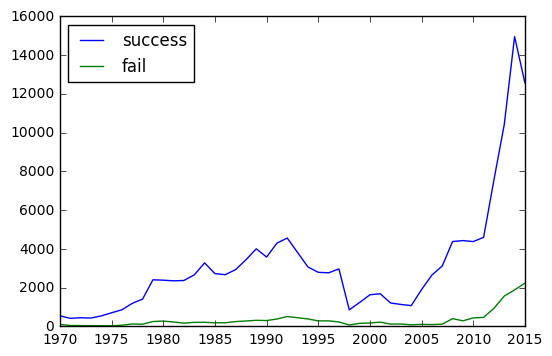

In [15]:
d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success','targtype1_txt':'target', 
             'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})

d['fatalities'] = d['fatalities'].fillna(0).astype(int)
d['injuries'] = d['injuries'].fillna(0).astype(int)

d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month', 'year']])

success_counts=d[d.success==1]['year'].value_counts().sort_index()
fail_counts=d[d.success==0]['year'].value_counts().sort_index()

plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)
plt.show

plt.savefig('ana_3\\successVSfail.png', bbox_inches='tight')

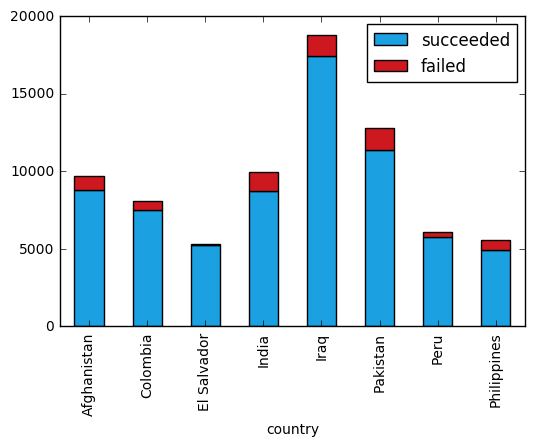

In [18]:
count_by_country = d[d.success== 1].groupby('country').count()['date']

df1=pd.DataFrame(index=count_by_country[count_by_country>500].index.unique())
df1["succeeded"]= d[d.success== 1].groupby('country')['date'].count().fillna(0)
df1["failed"]= d[d.success!= 1].groupby('country')['date'].count().fillna(0).sort_values(0,ascending=False)
#df1
df1[(df1.failed>0) & ((df1.succeeded + df1.failed) > 5000)].plot(kind='bar', stacked=True, color = ['#1ba1e2', '#cc181e'])

plt.savefig('ana_3\\successVSfail_country.png', bbox_inches='tight')

- There are far more successful acts than failed acts. It may mean either :
        - Data is not complete and failed terrorist acts are 100% reported.
        - The high success rate is real.
        - I suspect the reality is a mix between the two reasons. 
        - A failed terrorist acts may not hit the headlines and therefore will be absent from the data.